In [1]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  
import cv2 as cv
from copy import deepcopy

import os
import sys
from copy import deepcopy

# Add src to path
sys.path.append("src")
from BWImage import BWImage
import dft
from GeometricTransforms import rotate_translate


## Jupyter notebooks settings.

# Reload modules before executing each cell.
%load_ext autoreload
%autoreload 2 

# Print all print statements.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" 

# Set white as color for pixels with no value.
BWImage.blank_value = 0

# Introduction

In this lab  we obtain the depth information from the focus measure.

## Theory and implementation

I did a straight forward implementation of the transforms given in the problem statement.

There was one quirk associated with scipy's fft.
Scipy's `fft` operates row-wise, so `fft(U)` is actually $(\phi U^T)^T$.

For Q3, I use brute-force calculation to the rotated DFT. 
This works for $90^{\circ}$ and $180^{\circ}$ but not for $15^{\circ}$


## Code organization
**Input**: `data/input`

**Output**: `data/output`

**Source code**: `src`

* `BWImage.py`: Same from my previous labs. Implements a class with methods for basic image I/O.

* `dft.py`: Implements the algorithm to get shape from focus as described in class. It contains the following functions:
    - `fft_1d`, `ifft_1d`: Slightly modified FFT based on scipy's `fft`, but accounts for the quirk mentioned above.
    - `fft_2d`: Implement $V = \phi U \phi$ as $V^T = \phi (\phi U^T)^T$.
    - `ifft_2d`: Implement $U = \phi^* V \phi^*$ as $U^T = \phi^* (\phi^* V^T)^T$.


### A note on notation:
$I_i$ is the $i$-th image and $F_j$ is the DFT $j$-th image.

# Result

## Q1 & Q2.

#### Import data and apply the manipulation from problem statement.

In [78]:
# Read input.
I1 = cv.imread('data/input/fourier.png')
I2 = cv.imread('data/input/fourier_transform.png')
F1 = dft.fft_2d(I1)
F2 = dft.fft_2d(I2)
F3 = np.abs(F1) * np.exp(1) ** (1j * np.angle(F2))
F4 = np.abs(F2) * np.exp(1) ** (1j * np.angle(F1))
I3 = dft.ifft_2d(F3)
I4 = dft.ifft_2d(F4)

/mnt/d/projects/image-signal-processing/Lab7/src/dft.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  img_2d = img_2d.astype('int')


#### Plot the images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


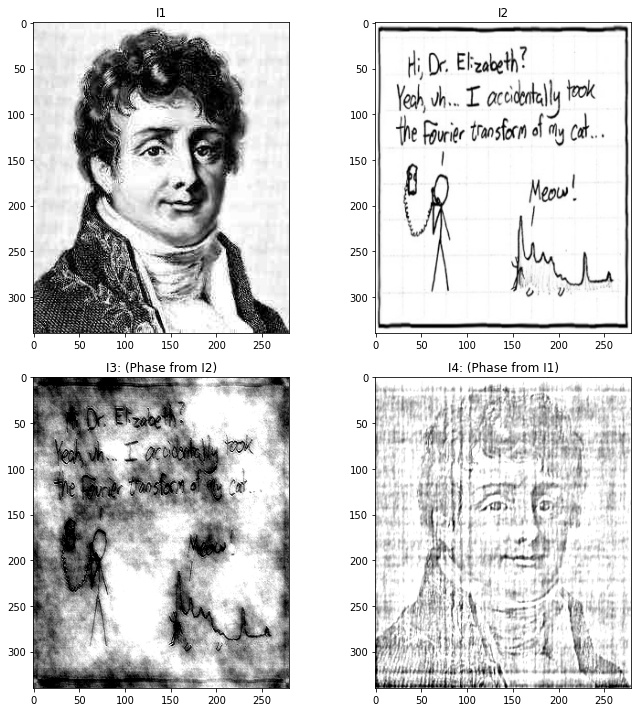

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(I1)
axs[0, 1].imshow(I2)
axs[1, 0].imshow(I3)
axs[1, 1].imshow(I4)
axs[0, 0].set_title('I1')
axs[0, 1].set_title('I2')
axs[1, 0].set_title('I3: (Phase from I2)')
axs[1, 1].set_title('I4: (Phase from I1)')
fig.tight_layout()

## Q3.

In [74]:
img = cv.imread('data/input/peppers_small.png')
F_0 = dft.dft_rotate(img, 0)
I_0 = dft.ifft_2d(F_0)
F_15 = dft.dft_rotate(img, np.pi/12) # Rotate by 15 degrees.
I_15 = dft.ifft_2d(F_15)
F_90 = dft.dft_rotate(img, np.pi/2) # Rotate by 15 degrees.
I_90 = dft.ifft_2d(F_90)
F_180 = dft.dft_rotate(img, np.pi) # Rotate by 15 degrees.
I_180 = dft.ifft_2d(F_180)

(82, 82)


  0%|          | 0/82 [00:00<?, ?it/s]

100%|██████████| 82/82 [07:02<00:00,  5.15s/it]
/mnt/d/projects/image-signal-processing/Lab7/src/dft.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  img_2d = img_2d.astype('int')


(82, 82)


100%|██████████| 82/82 [06:19<00:00,  4.63s/it]


(82, 82)


100%|██████████| 82/82 [06:17<00:00,  4.61s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Rotate by 15')

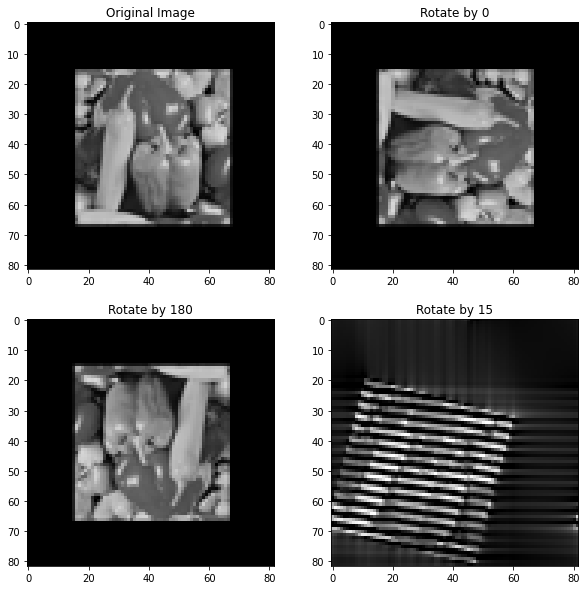

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img)
axs[0, 1].imshow(I_90)
axs[1, 0].imshow(I_180)
axs[1, 1].imshow(I_15)
axs[0, 0].set_title("Original Image")
axs[0, 1].set_title("Rotate by 90")
axs[1, 0].set_title("Rotate by 180")
axs[1, 1].set_title("Rotate by 15")